<a href="https://colab.research.google.com/github/archa8/keystroke-dynamics/blob/main/Archa_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keystroke Dynamic Classification using K Nearest Neighbours

#sh21.csv

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/sh21.csv')

In [ ]:
df

,User,Letter,Group,g1 Hold Latency,g1 Intergroup Latency,g1 Press Latency,g1 Release Latency,g2 Hold Latency,g2 Intergroup Latency,g2 Press Latency,g2 Release Latency,g3 Hold Latency,g3 Intergroup Latency,g3 Press Latency,g3 Release Latency,g4 Hold Latency,g4 Intergroup Latency,g4 Press Latency,g4 Release Latency
0,User1,a,g1,0.16933,0.20898,0.30177,0.22675,0.13024,0.75062,0.14689,0.41292,0.20879,0.88898,0.55048,0.35228,0.55338,0.97096,0.86648,0.11245
1,User1,s,g1,0.80952,0.91012,0.36696,0.82458,0.30503,0.72331,0.71436,0.23893,0.84008,0.58227,0.84022,0.57417,0.99507,0.36998,0.63427,0.52836
2,User1,d,g1,0.72081,0.61020,0.70860,0.18487,0.92590,0.95170,0.34198,0.14086,0.21010,0.86702,0.89865,0.59361,0.72795,0.86207,0.96266,0.90925
3,User1,f,g1,0.62838,0.73889,0.23196,0.66664,0.57375,0.87956,0.28970,0.77685,0.32485,0.24558,0.21615,0.51964,0.31818,0.29742,0.12582,0.68272
4,User1,q,g2,0.68924,0.15368,0.13365,0.99388,0.28355,0.42744,0.79157,0.75251,0.66853,0.41609,0.62995,0.83577,0.37858,0.11525,0.52850,0.37059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,User10,c,g3,0.69885,0.59177,0.59063,0.88983,0.10448,0.48721,0.69555,0.36037,0.57137,0.77300,0.29018,0.83639,0.73617,0.43298,0.59383,0.66986
156,User10,v,g3,0.76588,0.37461,0.39355,0.46055,0.94268,0.47158,0.63112,0.70926,0.31721,0.20010,0.22271,0.39765,0.71811,0.77829,0.43815,0.75296
157,User10,p,g4,0.18486,0.28423,0.33154,0.77354,0.70409,0.10174,0.21893,0.80968,0.64956,0.76152,0.82893,0.36444,0.99235,0.83910,0.33195,0.74133
158,User10,g,g4,0.22382,0.14255,0.21038,0.34396,0.13751,0.90804,0.68006,0.95843,0.84132,0.87878,0.72058,0.48511,0.10829,0.92759,0.48120,0.51949


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.columns

Index(['User', 'Letter', 'Group', 'g1 Hold Latency', 'g1 Intergroup Latency',
       'g1 Press Latency', 'g1 Release Latency', 'g2 Hold Latency',
       'g2 Intergroup Latency', 'g2 Press Latency', 'g2 Release Latency',
       'g3 Hold Latency', 'g3 Intergroup Latency', 'g3 Press Latency',
       'g3 Release Latency', 'g4 Hold Latency', 'g4 Intergroup Latency',
       'g4 Press Latency', 'g4 Release Latency'],
      dtype='object')

In [ ]:
label_encoder=LabelEncoder()
df['User']=label_encoder.fit_transform(df['User'])
df['Group']=label_encoder.fit_transform(df['Group'])
df['Letter']=label_encoder.fit_transform(df['Letter'])

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 11}

In [ ]:
knn2 = KNeighborsClassifier()#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 41}

In [ ]:
knn_gscv.best_score_

0.13125

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
                                           average='micro'))

Accuracy: 0.09375
Precision Score :  0.09375
Recall Score :  0.09375


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

3.495532863527391

In [ ]:
test_preds = knn.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

4.572335289542971

In [ ]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,51)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

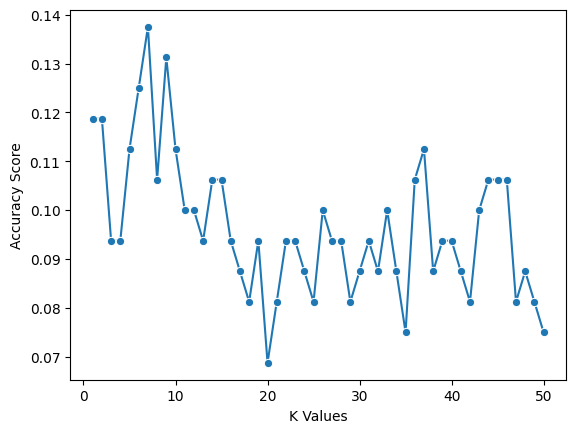

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

#sh22.csv

In [ ]:
df=pd.read_csv('/content/sh22.csv')

In [ ]:
df

,User,Letter,Group,g1 Hold Latency,g1 Intergroup Latency,g1 Press Latency,g1 Release Latency,g2 Hold Latency,g2 Intergroup Latency,g2 Press Latency,g2 Release Latency,g3 Hold Latency,g3 Intergroup Latency,g3 Press Latency,g3 Release Latency,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,User1,e,g1,0.84656,0.13009,0.94893,0.25551,0.89666,0.43275,0.17741,0.73712,0.31581,0.96610,0.76839,0.80056,0.42040,0.53832,0.40367,0.86809
1,User1,t,g1,0.41015,0.84651,0.36938,0.32562,0.35422,0.42503,0.50718,0.89445,0.94456,0.18996,0.32943,0.88088,0.20607,0.35779,0.77198,0.87520
2,User1,a,g1,0.84843,0.30016,0.41360,0.23597,0.28892,0.21615,0.67479,0.40906,0.71156,0.26302,0.97954,0.14992,0.70864,0.13075,0.82719,0.88982
3,User1,o,g1,0.35887,0.14375,0.51040,0.52760,0.17684,0.28580,0.90822,0.72473,0.21846,0.39991,0.25100,0.72046,0.72513,0.10122,0.27861,0.20715
4,User1,u,g2,0.47925,0.46487,0.35151,0.18842,0.20583,0.57359,0.88587,0.14313,0.34913,0.69743,0.16474,0.54767,0.86392,0.57795,0.37749,0.21596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,User10,y,g3,0.35293,0.20086,0.10979,0.11893,0.60223,0.97088,0.11623,0.56507,0.29078,0.70877,0.26479,0.33575,0.88071,0.30007,0.65548,0.79121
156,User10,g,g4,0.17600,0.63610,0.51051,0.18072,0.94725,0.93778,0.94260,0.75809,0.63356,0.47297,0.38864,0.97246,0.30543,0.95523,0.27058,0.41794
157,User10,c,g4,0.20275,0.61394,0.80494,0.67250,0.55307,0.26900,0.60998,0.37184,0.90593,0.11773,0.48544,0.12231,0.22715,0.59371,0.20136,0.86888
158,User10,v,g4,0.91667,0.17020,0.34362,0.31203,0.56616,0.37572,0.18651,0.50830,0.32461,0.62602,0.18408,0.28384,0.64061,0.18735,0.41500,0.72487


In [ ]:
label_encoder=LabelEncoder()
df['User']=label_encoder.fit_transform(df['User'])
df['Group']=label_encoder.fit_transform(df['Group'])
df['Letter']=label_encoder.fit_transform(df['Letter'])

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 44}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=44)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=44)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision Score : ",precision_score(y_test, y_pred,
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
                                           average='micro'))

Accuracy: 0.0625
Precision Score :  0.0625
Recall Score :  0.0625


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

3.950870157319777

In [ ]:
test_preds = knn.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

4.06201920231798

In [ ]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

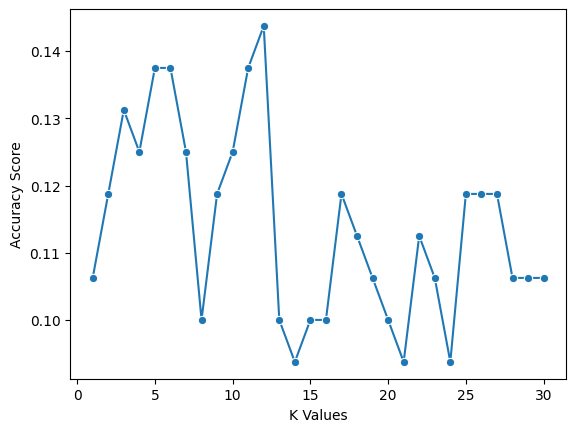

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

#sh23

Accuracy: 0.038461538461538464
Precision Score :  0.038461538461538464
Recall Score :  0.038461538461538464


Text(0, 0.5, 'Accuracy Score')

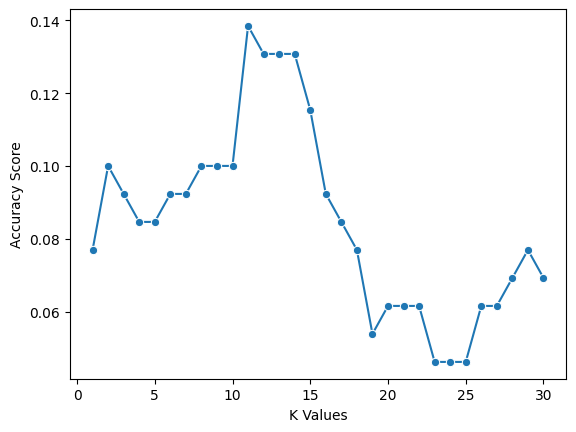

In [ ]:
df=pd.read_csv('/content/sh23.csv')
df
df.columns
label_encoder=LabelEncoder()
df['User']=label_encoder.fit_transform(df['User'])
df['Group']=label_encoder.fit_transform(df['Group'])
df['Letter']=label_encoder.fit_transform(df['Letter'])

X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision Score : ",precision_score(y_test, y_pred,
average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
average='micro'))
train_preds = knn.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

test_preds = knn.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

k_values = [i for i in range (1,31)]
scores = []
scaler = StandardScaler()
X = scaler.fit_transform(X)
for k in k_values:
	knn = KNeighborsClassifier(n_neighbors=k)
	score = cross_val_score(knn, X, y, cv=5)
	scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


In [ ]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'n_neighbors': 49}

In the above dataset, on finding the best no. of neighbours, the result is 49, but on training the dataset with k=49 gives accuracy 0.0; the accuracy is better with k=11 (arbitrarily chosen)

#sh24

Accuracy: 0.04807692307692308
Precision Score :  0.04807692307692308
Recall Score :  0.04807692307692308


Text(0, 0.5, 'Accuracy Score')

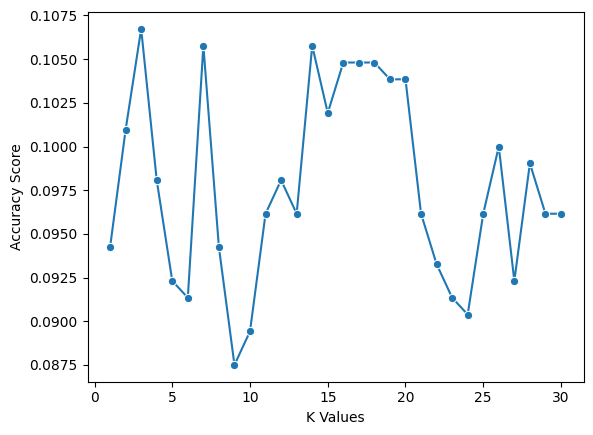

In [ ]:
df=pd.read_csv('/content/sh24.csv')
df
df.columns
label_encoder=LabelEncoder()
df['User']=label_encoder.fit_transform(df['User'])
df['Group']=label_encoder.fit_transform(df['Group'])
df['Letter']=label_encoder.fit_transform(df['Letter'])

X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

knn = KNeighborsClassifier(n_neighbors=48)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

print("Precision Score : ",precision_score(y_test, y_pred,
average='micro'))

print("Recall Score : ",recall_score(y_test, y_pred,
average='micro'))

train_preds = knn.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

test_preds = knn.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

k_values = [i for i in range (1,31)]
scores = []
scaler = StandardScaler()
X = scaler.fit_transform(X)
for k in k_values:
	knn = KNeighborsClassifier(n_neighbors=k)
	score = cross_val_score(knn, X, y, cv=5)
	scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


In [ ]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'n_neighbors': 48}

#sh26.csv

In [ ]:
df=pd.read_csv('/content/Dataset for ML team - sh26.csv')
df

,User,Letter,Group,g1 Hold Latency,g1 Intergroup Latency,g1 Press Latency,g1 Release Latency,g2 Hold Latency,g2 Intergroup Latency,g2 Press Latency,g2 Release Latency,g3 Hold Latency,g3 Intergroup Latency,g3 Press Latency,g3 Release Latency,g4 Hold Latency,g4 Intergroup Latency,g4 Press Latency,g4 Release Latency
0,User1,e,g1,0.69117,0.13452,0.95509,0.92467,0.44002,0.55818,0.70760,0.75837,0.20654,0.52768,0.40069,0.61051,0.35438,0.61427,0.88965,0.21985
1,User1,a,g1,0.56161,0.46307,0.52763,0.58556,0.42380,0.19380,0.46154,0.81112,0.30720,0.50187,0.74676,0.73624,0.42309,0.69794,0.13252,0.78471
2,User1,o,g1,0.35347,0.52280,0.53374,0.97196,0.72120,0.80231,0.85873,0.25045,0.20256,0.41585,0.49858,0.89567,0.90863,0.24955,0.44293,0.18411
3,User1,i,g1,0.51572,0.87596,0.81569,0.48691,0.60870,0.35652,0.67115,0.68321,0.74223,0.93888,0.39262,0.44331,0.58957,0.86700,0.38393,0.81595
4,User1,n,g1,0.51037,0.14786,0.30049,0.44814,0.17662,0.81103,0.98145,0.12357,0.72390,0.21724,0.24611,0.33170,0.97798,0.53957,0.75437,0.99743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,User10,k,g4,0.13200,0.23285,0.15801,0.71977,0.22301,0.28733,0.84655,0.78946,0.19778,0.34811,0.42518,0.74623,0.93471,0.88515,0.75446,0.41780
256,User10,q,g4,0.99522,0.41781,0.97397,0.54920,0.39929,0.82306,0.45546,0.73695,0.26396,0.41399,0.81620,0.54365,0.32417,0.95960,0.78425,0.11993
257,User10,v,g4,0.18576,0.19487,0.62621,0.74869,0.83725,0.34199,0.22745,0.91586,0.72091,0.83613,0.57645,0.73864,0.64620,0.68241,0.13858,0.14612
258,User10,x,g4,0.14017,0.99167,0.95486,0.69488,0.15618,0.74182,0.83944,0.84507,0.90325,0.44672,0.66782,0.26705,0.82465,0.88391,0.69769,0.46807


Accuracy: 0.04807692307692308
Precision Score :  0.04807692307692308
Recall Score :  0.04807692307692308


Text(0, 0.5, 'Accuracy Score')

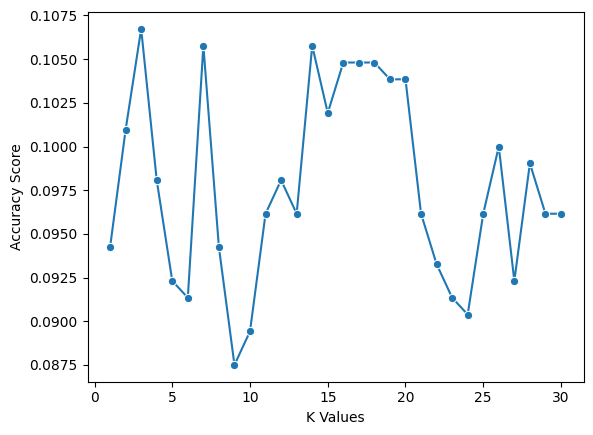

In [ ]:
df.columns
label_encoder=LabelEncoder()
df['User']=label_encoder.fit_transform(df['User'])
df['Group']=label_encoder.fit_transform(df['Group'])
df['Letter']=label_encoder.fit_transform(df['Letter'])

X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

knn = KNeighborsClassifier(n_neighbors=49)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision Score : ",precision_score(y_test, y_pred,
average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
average='micro'))

train_preds = knn.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

test_preds = knn.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

k_values = [i for i in range (1,31)]
scores = []
scaler = StandardScaler()
X = scaler.fit_transform(X)
for k in k_values:
	knn = KNeighborsClassifier(n_neighbors=k)
	score = cross_val_score(knn, X, y, cv=5)
	scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'n_neighbors': 49}

#sh27.csv

In [ ]:
df=pd.read_csv('/content/Dataset for ML team - Sh27.csv')
df

,User,Letter,Group,g1 Hold Latency,g1 Intergroup Latency,g1 Press Latency,g1 Release Latency,g2 Hold Latency,g2 Intergroup Latency,g2 Press Latency,g2 Release Latency,g3 Hold Latency,g3 Intergroup Latency,g3 Press Latency,g3 Release Latency,g4 Hold Latency,g4 Intergroup Latency,g4 Press Latency,g4 Release Latency
0,User1,a,g1,0.45521,0.14254,0.72558,0.55608,0.39429,0.91606,0.21435,0.68223,0.18183,0.95762,0.46794,0.56290,0.97558,0.44562,0.52258,0.74875
1,User1,l,g1,0.75931,0.60583,0.53464,0.62632,0.83599,0.37490,0.14391,0.10440,0.65245,0.98807,0.58446,0.11404,0.38127,0.80759,0.72118,0.25261
2,User1,q,g1,0.90264,0.21508,0.94788,0.85283,0.77824,0.42448,0.72629,0.82392,0.93617,0.60130,0.31577,0.32763,0.22472,0.54237,0.41765,0.61201
3,User1,m,g1,0.80672,0.59402,0.59259,0.68785,0.36293,0.91582,0.28785,0.70549,0.58070,0.31539,0.60412,0.20458,0.70997,0.67113,0.89665,0.29353
4,User1,p,g1,0.64664,0.32539,0.48848,0.44894,0.70712,0.19220,0.97709,0.64321,0.98489,0.61766,0.58237,0.10685,0.58209,0.95283,0.43638,0.69447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,User10,g,g4,0.90428,0.62876,0.72010,0.64855,0.56354,0.98544,0.83530,0.70770,0.65263,0.32259,0.52723,0.29899,0.99330,0.96263,0.65052,0.38527
246,User10,h,g4,0.61497,0.58651,0.91732,0.95505,0.85238,0.19174,0.24113,0.78928,0.48547,0.79165,0.88815,0.95816,0.35594,0.75045,0.93222,0.64093
247,User10,t,g4,0.67687,0.95317,0.35097,0.90591,0.46363,0.75062,0.86035,0.14882,0.24823,0.80721,0.22926,0.77773,0.64478,0.65884,0.93452,0.44138
248,User10,y,g4,0.95386,0.18265,0.60097,0.17730,0.43693,0.10224,0.19926,0.82612,0.49636,0.95711,0.58753,0.60662,0.34564,0.19845,0.41585,0.35589


Accuracy: 0.0625
Precision Score :  0.0625
Recall Score :  0.0625


Text(0, 0.5, 'Accuracy Score')

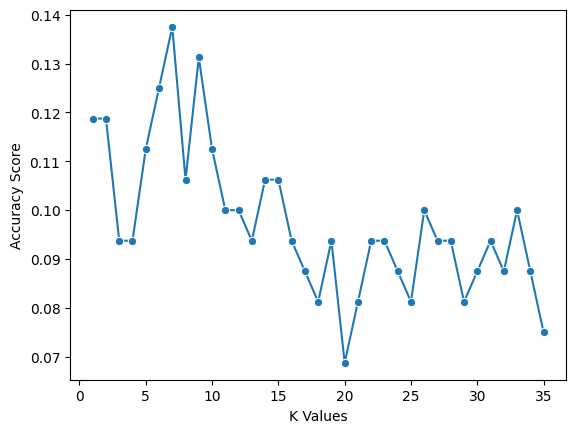

In [ ]:
df.columns
label_encoder=LabelEncoder()
df['User']=label_encoder.fit_transform(df['User'])
df['Group']=label_encoder.fit_transform(df['Group'])
df['Letter']=label_encoder.fit_transform(df['Letter'])

X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

knn = KNeighborsClassifier(n_neighbors=32)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision Score : ",precision_score(y_test, y_pred,
average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred,
average='micro'))

train_preds = knn.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

test_preds = knn.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

k_values = [i for i in range (1,36)]
scores = []
scaler = StandardScaler()
X = scaler.fit_transform(X)
for k in k_values:
	knn = KNeighborsClassifier(n_neighbors=k)
	score = cross_val_score(knn, X, y, cv=5)
	scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'n_neighbors': 32}